In [1]:
# import dependencies
# data cleaning and manipulation 
import pandas as pd
import numpy as np

# machine learning
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/data.csv')

In [3]:
cols = ["id",
        "Unnamed: 32",
        'radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst',
        'perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se',
        'concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
df = df.drop(cols, axis=1)
print('Shape of the dataframe: ', df.shape)
# verify remaining columns
df.columns

Shape of the dataframe:  (569, 13)


Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

# Support Vector Machine Model

Before we apply this model, we need to normalize the input data. If different attributes have different ranges, the attribute with a higher range has more impact on the model. To overcome this problem, we will normalize or scale the data, so all attributes have a consistent range.

There are two popular techniques to scale data, and we shall apply our algorithm to each of them:

Normalization
Min Max Scaling

# 1. Normalization

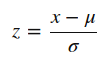

In [5]:
y = df.diagnosis.values
x_data = df.drop(['diagnosis'], axis = 1)

In [6]:
# Normalize
x_norm = (x_data - np.mean(x_data)) / (np.std(x_data))
x_norm.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
0,1.097064,-2.073335,1.568466,3.283515,2.217515,2.255747,2.489734,-0.565265,-0.214002,1.316862,1.148757,0.907083
1,1.829821,-0.353632,-0.826962,-0.487072,0.001392,-0.868652,0.499255,-0.876244,-0.605351,-0.692926,-0.805450,-0.099444
2,1.579888,0.456187,0.942210,1.052926,0.939685,-0.398008,1.228676,-0.780083,-0.297005,0.814974,0.237036,0.293559
3,-0.768909,0.253732,3.283553,3.402909,2.867383,4.910919,0.326373,-0.110409,0.689702,2.744280,4.732680,2.047511
4,1.750297,-1.151816,0.280372,0.539340,-0.009560,-0.562450,1.270543,-0.790244,1.483067,-0.048520,-0.361092,0.499328


In [7]:
#Split the train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x_norm,y,test_size = 0.3 ,random_state=40)

In [24]:
from sklearn.svm import SVC
svm = SVC(random_state = 1, gamma="auto")
svm.fit(x_train, y_train)

acc = svm.score(x_test,y_test)*100
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 96.49%


### The SVM Algorithm with normalised input has an accuracy of 96.49%

# 2. Min Max Scaling

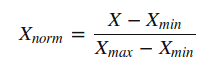

In [25]:
y = df.diagnosis.values
x_data = df.drop(['diagnosis'], axis = 1)

In [26]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [27]:
#Split the train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3 ,random_state=40)

In [28]:
from sklearn.svm import SVC
svm = SVC(random_state = 1, gamma="auto")
svm.fit(x_train, y_train)

acc = svm.score(x_test,y_test)*100
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 93.57%


### The SVM Algorithm with Min Max Scaled inputs has an accuracy of 93.57%